<a href="https://colab.research.google.com/github/Hydovative/nandur/blob/main/The_hidrovative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lib and import data

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define root directory
dir_root = '/content/drive/MyDrive/nandur'

# Split Data function

In [ ]:
def split_data(root_dir, train_size=0.8, val_size=0.15, test_size=0.05, random_seed=42):
    # Membuat direktori untuk train, val, dan test
    train_dir = os.path.join(root_dir, 'train')
    val_dir = os.path.join(root_dir, 'val')
    test_dir = os.path.join(root_dir, 'test')

    # Membuat direktori train jika belum ada
    if not os.path.exists(train_dir):
        os.makedirs(train_dir)

    # Membuat direktori val jika belum ada
    if not os.path.exists(val_dir):
        os.makedirs(val_dir)

    # Membuat direktori test jika belum ada
    if not os.path.exists(test_dir):
        os.makedirs(test_dir)

    # Loop melalui setiap direktori (jenis tanaman)
    for plant_type in os.listdir(root_dir):
        if os.path.isdir(os.path.join(root_dir, plant_type)):
            # Membuat sub-direktori untuk setiap jenis tanaman di setiap direktori (train, val, test)
            train_plant_dir = os.path.join(train_dir, plant_type)
            val_plant_dir = os.path.join(val_dir, plant_type)
            test_plant_dir = os.path.join(test_dir, plant_type)

            if not os.path.exists(train_plant_dir):
                os.makedirs(train_plant_dir)

            if not os.path.exists(val_plant_dir):
                os.makedirs(val_plant_dir)

            if not os.path.exists(test_plant_dir):
                os.makedirs(test_plant_dir)

            # Mengambil daftar file gambar untuk setiap jenis tanaman
            plant_images = [img for img in os.listdir(os.path.join(root_dir, plant_type)) if os.path.isfile(os.path.join(root_dir, plant_type, img))]

            # Membagi data menjadi train, val, dan test
            train_images, test_images = train_test_split(plant_images, test_size=val_size + test_size, random_state=random_seed)
            val_images, test_images = train_test_split(test_images, test_size=test_size/(val_size + test_size), random_state=random_seed)

            # Memindahkan gambar ke dalam direktori yang sesuai
            for image in train_images:
                src_path = os.path.join(root_dir, plant_type, image)
                dest_path = os.path.join(train_plant_dir, image)
                shutil.copy(src_path, dest_path)

            for image in val_images:
                src_path = os.path.join(root_dir, plant_type, image)
                dest_path = os.path.join(val_plant_dir, image)
                shutil.copy(src_path, dest_path)

            for image in test_images:
                src_path = os.path.join(root_dir, plant_type, image)
                dest_path = os.path.join(test_plant_dir, image)
                shutil.copy(src_path, dest_path)

# Split here

In [ ]:
try:
    split_sehat = split_data(dir_root)
    if len(split_sehat) == 0:
        raise ValueError("No data found in the directory.")
    # Continue with the rest of your code
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")
except ValueError as ve:
    print(ve)
    # Handle the case when no data is found

With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


# Direktori cek and clear

In [ ]:
def cek_dir(root_dir):
  ada_sub_direktori_kosong = False  # Inisialisasi flag
  for rootdir, dirs, files in os.walk(root_dir):
      for subdir in reversed(dirs):
          subdir_path = os.path.join(rootdir, subdir)
          if len(os.listdir(subdir_path)) == 0:
              print(f"Sub-direktori kosong: {subdir_path}")
              dirs.remove(subdir)
              os.rmdir(subdir_path)
          else:
                print(f"Sub-direktori berisi file: {subdir_path}")
  # Cek flag dan cetak pesan sesuai
  if not ada_sub_direktori_kosong:
    print("Tidak ada sub-direktori kosong.")

In [ ]:
cek_dir(dir_root)

Sub-direktori berisi file: /content/drive/MyDrive/nandur/test
Sub-direktori berisi file: /content/drive/MyDrive/nandur/val
Sub-direktori berisi file: /content/drive/MyDrive/nandur/train
Sub-direktori berisi file: /content/drive/MyDrive/nandur/Pokchoy_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/selada_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/selada_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/tomat_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/daun_tomat_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/daun_tomat_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/timun_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/sawi_sakit
Sub-direktori berisi file: /content/drive/MyDrive/nandur/timun_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/pokchoy_sehat
Sub-direktori berisi file: /content/drive/MyDrive/nandur/tomat_sehat
Sub-direktori berisi file: /content/driv

In [ ]:
def cek_indir(directory):
    for folder in os.listdir(directory):
        folder_path = os.path.join(directory, folder)
        if folder in ["train", "val", "test"]:
            for plant_folder in os.listdir(folder_path):
                plant_path = os.path.join(folder_path, plant_folder)
                if os.path.isdir(plant_path):
                    num_train_data = len(os.listdir(plant_path))
                    print(f"{folder} of images in {plant_folder}, {directory}: {num_train_data}")
            print("\n")

In [ ]:
cek_indir(dir_root)

train of images in daun_timun_sehat, /content/drive/MyDrive/nandur: 80
train of images in daun_timun_sakit, /content/drive/MyDrive/nandur: 80
train of images in sawi_sehat, /content/drive/MyDrive/nandur: 80
train of images in tomat_sehat, /content/drive/MyDrive/nandur: 82
train of images in pokchoy_sehat, /content/drive/MyDrive/nandur: 80
train of images in timun_sehat, /content/drive/MyDrive/nandur: 108
train of images in sawi_sakit, /content/drive/MyDrive/nandur: 100
train of images in timun_sakit, /content/drive/MyDrive/nandur: 98
train of images in daun_tomat_sehat, /content/drive/MyDrive/nandur: 82
train of images in daun_tomat_sakit, /content/drive/MyDrive/nandur: 80
train of images in tomat_sakit, /content/drive/MyDrive/nandur: 84
train of images in selada_sakit, /content/drive/MyDrive/nandur: 80
train of images in selada_sehat, /content/drive/MyDrive/nandur: 80
train of images in Pokchoy_sakit, /content/drive/MyDrive/nandur: 88


val of images in daun_timun_sehat, /content/driv

# image generator

In [ ]:
train_root = '/content/drive/MyDrive/nandur/train'
val_root = '/content/drive/MyDrive/nandur/val'
test_root = '/content/drive/MyDrive/nandur/test'


**ImageDataGenerator**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training dataset (sehat)
training_datagen = ImageDataGenerator(
    rescale=1./255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for validation dataset (sehat)
validation_datagen = ImageDataGenerator(rescale=1./255.0)

# Rescaling for test dataset (sehat)
test_datagen = ImageDataGenerator(rescale=1./255.0)

In [ ]:
# Flow training images in batches using training_datagen generator
train_generator = training_datagen.flow_from_directory(
    directory=train_root,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32
)

# Flow validation images in batches using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    directory=val_root,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32
)

# Flow test images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    directory=test_root,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',  # Adjust based on your data class type
    shuffle=False  # Ensure no data shuffling
)

Found 1202 images belonging to 14 classes.
Found 224 images belonging to 14 classes.
Found 154 images belonging to 14 classes.


# Def Model

**Model klasifikasi**

In [ ]:
def klas_base_model(input_shape, num_class):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(input_shape)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
  ])
  model.compile(loss = 'categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
  return model


# Callback

In [ ]:
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      # Check the loss
      if(logs.get('accuracy') > 0.95):

        # Stop if threshold is met
        print("\nLoss is lower than 0.3 and acc is above 0.9 so cancelling training!")
        self.model.stop_training = True
        print(f'Epoch {epoch} ended with logs: {logs}')
# Instantiate class
callbacks = Callback()

# Model Sumary





In [ ]:
# Print the model summary
model_klas = klas_base_model(input_shape=(150, 150,3), num_class=14)
model_klas.summary()

NameError: ignored

# Training Base Model

In [ ]:
# train tanaman sehat/jenis tanaman
nandur = model_klas
nandur.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    callbacks=[callbacks])

Epoch 1/100
38/38 [==============================] - 31s 775ms/step - loss: 2.4887 - accuracy: 0.1248 - val_loss: 2.3595 - val_accuracy: 0.1473
Epoch 2/100
38/38 [==============================] - 30s 784ms/step - loss: 2.3854 - accuracy: 0.1448 - val_loss: 2.2998 - val_accuracy: 0.1786
Epoch 3/100
38/38 [==============================] - 29s 753ms/step - loss: 2.2581 - accuracy: 0.1714 - val_loss: 2.1614 - val_accuracy: 0.1920
Epoch 4/100
38/38 [==============================] - 30s 781ms/step - loss: 2.1414 - accuracy: 0.2188 - val_loss: 2.1340 - val_accuracy: 0.1875
Epoch 5/100
38/38 [==============================] - 30s 783ms/step - loss: 2.0717 - accuracy: 0.2379 - val_loss: 1.9587 - val_accuracy: 0.2768
Epoch 6/100
38/38 [==============================] - 30s 775ms/step - loss: 1.9686 - accuracy: 0.2662 - val_loss: 1.8742 - val_accuracy: 0.3170
Epoch 7/100
38/38 [==============================] - 30s 774ms/step - loss: 1.8785 - accuracy: 0.3020 - val_loss: 1.7265 - val_accuracy:

# Save Model

In [ ]:
# Save the entire model to a file
nandur.save("/content/drive/MyDrive/model/nandur.h5")

# Alternatively, you can save only the model architecture to a JSON file and the weights to a separate file
# Save the model architecture to a JSON file
model_json = nandur.to_json()
with open("/content/drive/MyDrive/model/nandur.json", "w") as json_file:
    json_file.write(model_json)

# Save the model weights to a file
nandur.save_weights("/content/drive/MyDrive/model/nandur_weights.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Ploting


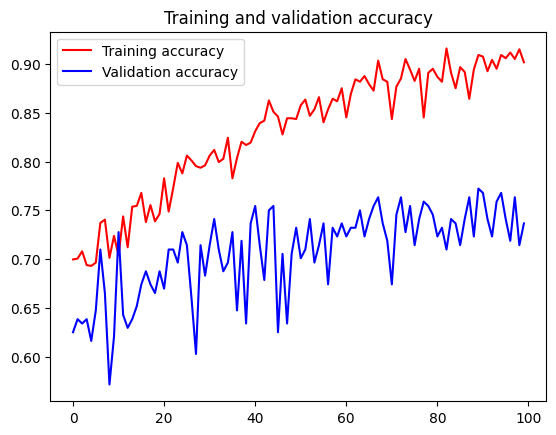

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

history = nandur.history

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

# Test model tanaman


In [ ]:
# Make predictions on the test data
predictions = nandur.predict_generator(test_generator, steps=len(test_generator), verbose=1)

class_labels = ["bok choy sakit", "daun timun sakit", "daun timun sehat",
                "daun tomat sakit", "daun tomat sehat", "bok choy sehat",
                "sawi sakit", "sawi sehat","selada sakit", "selada sehat",
                "timun sakit","timun sehat", "tomat sakit", "tomat sehat"]
class_indices = []
# Decode predictions into class labels
decoded_labels = []
for prediction in predictions:
    # Get the index of the maximum probability
    predicted_class_index = np.argmax(prediction)

    # Get the corresponding class label
    predicted_class_label = class_labels[predicted_class_index]

    # Append the predicted class label to the list
    decoded_labels.append(predicted_class_label)
    class_indices.append(predicted_class_index)

# Get the file names from the test generator
file_names = test_generator.filenames

for file_name, predicted_label, predicted_probabilities in zip(file_names, decoded_labels, predictions):
    print(f"File: {file_name}")
    print(f"Predicted Label: {predicted_label}")
    print("Predicted Probabilities:")

    # Print the probabilities for each class
    for class_label, probability in zip(class_labels, predicted_probabilities):
        print(f"{class_label}: {probability:.4f}")

    print("\n")


 13/154 [=>............................] - ETA: 1s

<ipython-input-55-bc3106e3c070>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = nandur.predict_generator(test_generator, steps=len(test_generator), verbose=1)


154/154 [==============================] - 2s 10ms/step
File: Pokchoy_sakit/30_jpg.rf.042da058c7df5b3bc30afa6551abde8c.jpg
Predicted Label: bok choy sakit
Predicted Probabilities:
bok choy sakit: 0.9164
daun timun sakit: 0.0000
daun timun sehat: 0.0000
daun tomat sakit: 0.0001
daun tomat sehat: 0.0000
bok choy sehat: 0.0000
sawi sakit: 0.0005
sawi sehat: 0.0000
selada sakit: 0.0829
selada sehat: 0.0001
timun sakit: 0.0000
timun sehat: 0.0000
tomat sakit: 0.0000
tomat sehat: 0.0000


File: Pokchoy_sakit/30_jpg.rf.b170f778046e1cb2c71a1363bfbd786f.jpg
Predicted Label: timun sakit
Predicted Probabilities:
bok choy sakit: 0.0245
daun timun sakit: 0.0000
daun timun sehat: 0.0000
daun tomat sakit: 0.0002
daun tomat sehat: 0.0000
bok choy sehat: 0.0009
sawi sakit: 0.0280
sawi sehat: 0.0021
selada sakit: 0.0015
selada sehat: 0.0172
timun sakit: 0.9176
timun sehat: 0.0067
tomat sakit: 0.0000
tomat sehat: 0.0013


File: Pokchoy_sakit/60-Copy_jpg.rf.4258d6abb898d615f0276518e4e5f928.jpg
Predicted L

In [ ]:
# Plot the predictions
plt.figure(figsize=(12, 6))
plt.bar(range(len(class_indices)), np.max(predictions, axis=1), tick_label=file_names, color='blue')
plt.xlabel('File Names')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability for Each Class')
plt.show()

# Upload predict

In [ ]:
for fn in uploaded.keys():
    # predicting images
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = jenis_tanaman.predict(images, batch_size=10)
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]
    decoded_labels.append(predicted_class_label)

# Move this line outside the loop
decoded_predictions = decoded_labels

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

class_labels = ["bok choy", "daun timun", "daun tomat", "kubis", "sawi", "selada", "timun", "tomat"]

uploaded = files.upload()

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Normalize the pixel values to be in the range [0, 1]
    x /= 255.0

    # Predict jenis_tanaman
    predictions_jenis = jenis_tanaman2.predict(x, batch_size=10)
    predicted_class_index_jenis = np.argmax(predictions_jenis)
    predicted_class_label_jenis = class_labels[predicted_class_index_jenis]

    print(f"{fn} - Jenis Tanaman: {predicted_class_label_jenis}")

    # Predict keadaan_tanaman
    predictions_keadaan = keadaan_tanaman.predict(x, batch_size=10)

    print(f"Keadaan Tanaman Probability: {predictions_keadaan[0]}")

    if predictions_keadaan[0] >= 0.3:
        print(f"{fn} - Sakit")
    else:
        print(f"{fn} - Sehat")

Saving Cucumber192.jpg to Cucumber192.jpg
1/1 [==============================] - 0s 28ms/step
Cucumber192.jpg - Jenis Tanaman: bok choy
1/1 [==============================] - 0s 28ms/step
Keadaan Tanaman Probability: [0.44826052]
Cucumber192.jpg - Sakit


In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

class_labels = ["bok choy", "daun timun", "daun tomat", "kubis", "sawi", "selada", "timun", "tomat"]

decoded_labels = []

for fn in uploaded.keys():
    # predicting images
    path = fn
    img = load_img(path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = jenis_tanaman.predict(images, batch_size=10)
    predicted_class_index = np.argmax(classes)
    predicted_class_label = class_labels[predicted_class_index]
    decoded_labels.append(predicted_class_label)

# Move this line outside the loop
decoded_predictions = decoded_labels

# Get the file names from the test generator
file_names = test_generator_sehat.filenames

# Print the file names and decoded predictions
for file_name, prediction in zip(file_names, decoded_predictions):
    print(f"File: {file_name}, Prediction: {prediction}")

    # Replace 'model' with the appropriate model variable (e.g., jenis_tanaman)
    classes = keadaan_tanaman.predict(images, batch_size=10)

    print(classes[0])

    if classes[0] > 0.5:
        print(file_name + " is a dog")
    else:
        print(file_name + " is a cat")


KeyboardInterrupt: ignored